<a href="https://colab.research.google.com/github/shubh-gna/gdg-hackathon-ml-model/blob/main/model_for_skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [ ]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip"
!unzip -qo CNN_model_dataset.zip 
!rm CNN_model_dataset.zip

--2022-09-03 18:43:12--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.123
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170317173 (162M) [application/x-zip-compressed]
Saving to: ‘CNN_model_dataset.zip’

CNN_model_dataset.z 100%[===================>] 162.43M  13.2MB/s    in 14s     

2022-09-03 18:43:27 (11.6 MB/s) - ‘CNN_model_dataset.zip’ saved [170317173/170317173]



In [ ]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [ ]:
train='data/train/'

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='training',
    seed=50 )

Found 2637 files belonging to 2 classes.
Using 1978 files for training.


In [ ]:
val='data/train/'

In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='validation',
    seed=50
    )

Found 2637 files belonging to 2 classes.
Using 659 files for validation.


In [ ]:
test='data/test/'

In [ ]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=35,
    seed=50
    )

Found 660 files belonging to 2 classes.


In [ ]:
class_names = ['Benign', 'Malignant']

In [ ]:
train_data.class_names = class_names
val_data.class_names = class_names

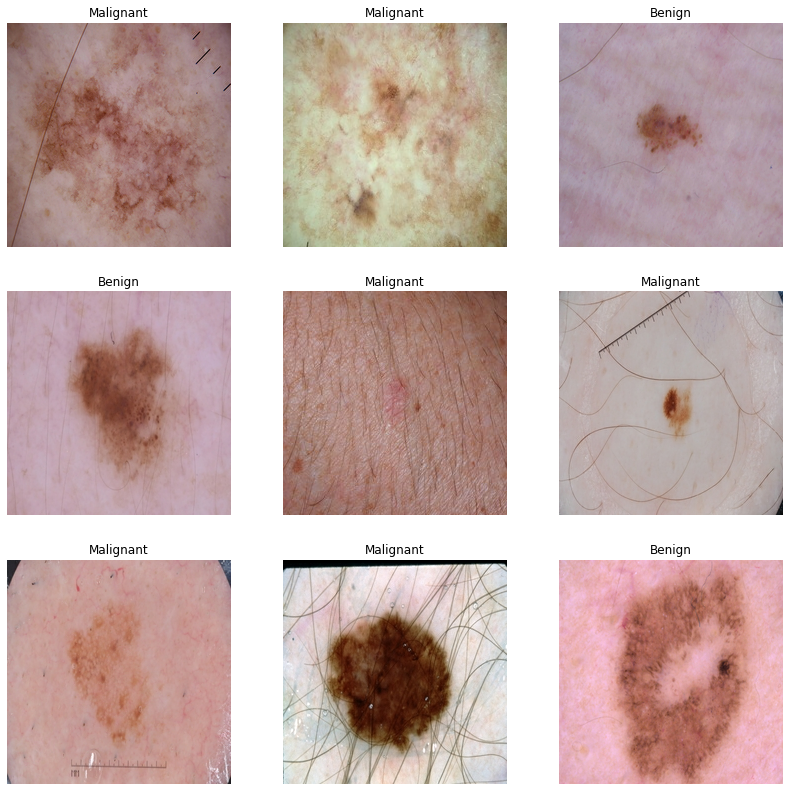

In [ ]:
plt.figure(figsize=(14, 14))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
#CNN Layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
samples=2637
batch_size=35
new_values= samples//batch_size
value=print(new_values)
history = model.fit(
          train_data,
          steps_per_epoch = value,
          epochs=10,
          validation_data=val_data,
                             )

75
Epoch 1/10
57/57 [==============================] - 111s 2s/step - loss: 0.6889 - accuracy: 0.5480 - val_loss: 0.6628 - val_accuracy: 0.6404
Epoch 2/10
57/57 [==============================] - 109s 2s/step - loss: 0.6338 - accuracy: 0.6244 - val_loss: 0.5836 - val_accuracy: 0.6904
Epoch 3/10
57/57 [==============================] - 108s 2s/step - loss: 0.5560 - accuracy: 0.7058 - val_loss: 0.5408 - val_accuracy: 0.7360
Epoch 4/10
57/57 [==============================] - 108s 2s/step - loss: 0.5224 - accuracy: 0.7381 - val_loss: 0.5037 - val_accuracy: 0.7405
Epoch 5/10
57/57 [==============================] - 108s 2s/step - loss: 0.4609 - accuracy: 0.7654 - val_loss: 0.6303 - val_accuracy: 0.7208
Epoch 6/10
57/57 [==============================] - 108s 2s/step - loss: 0.4669 - accuracy: 0.7664 - val_loss: 0.5325 - val_accuracy: 0.7511
Epoch 7/10
57/57 [==============================] - 108s 2s/step - loss: 0.4513 - accuracy: 0.7710 - val_loss: 0.4601 - val_accuracy: 0.7785
Epoch 8/10

In [ ]:
model.evaluate(val_data)

19/19 [==============================] - 10s 497ms/step - loss: 0.4247 - accuracy: 0.8103


[0.42473798990249634, 0.810318648815155]

In [ ]:
model.evaluate(test_data)

19/19 [==============================] - 9s 462ms/step - loss: 0.4122 - accuracy: 0.8258


[0.41219690442085266, 0.8257575631141663]

In [ ]:
model.save("cnn_model_skin1.h5")

In [ ]:
from tensorflow.keras.models import load_model       
prediction=tf.keras.models.load_model("cnn_model_skin1.h5")
from tensorflow.keras.preprocessing import image
import glob
import cv2

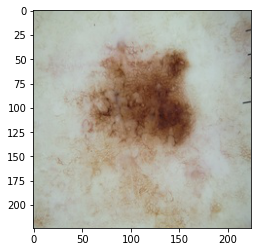

--------------Malignant-------------





In [ ]:
img=image.load_img('dummy/30.jpg')
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
p=np.argmax(prediction.predict(x))
if p==0:
    print("---------------Benign---------------\n\n\n")
elif p==1:
    print("--------------Malignant-------------\n\n\n")